In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from scipy import stats
from env import get_connection
from sqlalchemy import text, create_engine

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.

1) Has the network latency gone up since we switched internet service providers?

Null hypothesis : There has been no changes to the network latency since we switched internet providers.

Alternate hypothesis : The network latency has gone up since we switched internet service providers. 

True Positive : It is indeed true that the network latency has gone up since switching providers because the analysis detects a significant increase in network latency.

True Negative : It is true that the latency has not changed since switching providers because the analysis correctly finds no significant increase in network latency.  

Type I Error : The analysis incorrectly concludes that there is significant increase in network latency, but in reality, the latency has not changed since switching providers.

Type II Error : The analysis fails to detect a significant increase in network latency, but in reality, the latenct has gone up since switching providers.

2) Is the website redesign any good?

Null hypothesis : The website redesign has not played a significant role in improving performance or user engagement.

Alternative hypothesis : The website redesign has led to improved performance and user engagement.

True Positive : The website redesign is indeed effective because the evaluation indicates a significant improvement in performance and user engagement.

True Negative : The website redesign has not been effective because the evaluation correctly concludes that there is no significant improvement in performance and user engagement.

Type I : The evaluation is incorrect because it suggests a significant improvement in performance and user engagement even though there is no actual improvement.

Type II : The evaluation fails to detect a significant improvement in performance or user engagement, but the website redesign is actually effective

3) Is our television ad driving more sales?

Null hypothesis : Our television ad has not played a crucial in driving up overall sales.

Alternative hypothesis : Our television ad has led to a significant rise in overall sales.

True Positive : Based on our analysis, it is evident that our television ad has played a crucial role in driving up overall sales.

True Negative : It is evident that our television ad has not not led to a signiificant rise in overall sales, based on our analysis.

Type I : The analysis does not support the proposition that our television ad has resulted in a significant increase in overall sales, given that there has been no observed improvement in the overall sales figures.

Type II : The analysis fails to detect a significant increase in sales, despite the television ad being actually effective in drving up sales.

# Comparison of Groups

1) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	        49	  20

Doesn't Use A Macbook	1	  30

In [3]:
data = {
    'Codeup Student': [49, 1],
    'Not code up student': [20, 30],
}

index = ['Uses a Macbook', 'Does not Use A Macbook']

In [4]:
cs = pd.DataFrame(data, index=index)
cs

,Codeup Student,Not code up student
Uses a Macbook,49,20
Does not Use A Macbook,1,30


In [5]:
chi, p, degf, exp = stats.chi2_contingency(cs)

In [6]:
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis. There appears to be a relationship


2) Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.

State your alpha.

Perform a chi2 test of independence.

State your conclusion

In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg['suv_vs_nonsuv'] = np.where(mpg['class'].str.startswith('s'), 'suv', 'not_suv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,suv_vs_nonsuv
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,not_suv
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,not_suv
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,not_suv
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,not_suv
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,not_suv


In [11]:
mpg['4wd_vs_f_or_rwd'] = np.where(mpg['drv'].str.startswith('4'), '4wd', 'f_or_rwd')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,suv_vs_nonsuv,4wd_vs_f_or_rwd
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,not_suv,f_or_rwd
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,not_suv,f_or_rwd
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,not_suv,f_or_rwd
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,not_suv,f_or_rwd
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,not_suv,f_or_rwd


Null hypothesis : There is no association between suvs and 4wd

Alternative : There is an association between suvs and 4wd

In [12]:
c_drv = pd.crosstab(mpg.suv_vs_nonsuv, mpg['4wd_vs_f_or_rwd'])
c_drv

4wd_vs_f_or_rwd,4wd,f_or_rwd
suv_vs_nonsuv,,
not_suv,48,89
suv,55,42


In [13]:
chi, p, degf, exp = stats.chi2_contingency(c_drv)

In [14]:
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis. There appears to be a relationship


3) Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager?

In [15]:
def get_db_url(database):
    return get_connection(database)

In [16]:
url = get_db_url('employees')

In [17]:
engine =  create_engine(url)

In [18]:
query = '''
        SELECT *
        FROM employees
        LEFT JOIN dept_emp ON dept_emp.emp_no = employees.emp_no
        LEFT JOIN departments ON departments.dept_no = dept_emp.dept_no
        WHERE to_date > CURDATE() AND (dept_name = 'sales' OR dept_name = 'marketing')
        '''

In [19]:
text_query = text(query)

In [20]:
df = pd.read_sql(text(query), engine.connect())
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,d001,1993-08-03,9999-01-01,d001,Marketing
1,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,10058,d001,1988-04-25,9999-01-01,d001,Marketing
2,10140,1957-03-11,Yucel,Auria,F,1991-03-14,10140,d001,1991-03-14,9999-01-01,d001,Marketing
3,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,10228,d001,1993-01-28,9999-01-01,d001,Marketing
4,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,10239,d001,1996-05-04,9999-01-01,d001,Marketing


In [22]:
gd = pd.crosstab(df.gender, df.dept_name)
gd

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [23]:
chi, p, degf, exp = stats.chi2_contingency(gd)

In [24]:
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [25]:
query = '''
        SELECT *
        FROM employees
        LEFT JOIN dept_manager ON dept_manager.emp_no = employees.emp_no
        '''

In [26]:
text_query = text(query)

In [27]:
dfm = pd.read_sql(text(query), engine.connect())
dfm.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,NaN,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,NaN,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,NaN,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,NaN,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,NaN,None,None,None


In [28]:
dfm['managers'] = np.where(dfm['dept_no'].str.startswith('d'), 'manager', 'not_manager')
dfm.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,managers
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,NaN,None,None,None,not_manager
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,NaN,None,None,None,not_manager
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,NaN,None,None,None,not_manager
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,NaN,None,None,None,not_manager
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,NaN,None,None,None,not_manager


In [29]:
dfm.managers.value_counts()

managers
not_manager    300000
manager            24
Name: count, dtype: int64

In [30]:
m = pd.crosstab(dfm.gender, dfm.managers)
m

managers,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [31]:
chi, p, degf, exp = stats.chi2_contingency(m)

In [32]:
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


# Correlation

1) Answer with the type of stats test you would use (assume normal distribution):

a) Is there a relationship between the length of your arm and the length of your foot

Pearsons

b) Does smoking affect when or not someone has lung cancer?

Chi2

c) Is gender independent of a person’s blood type?

Chi2

d) Does whether or not a person has a cat or dog affect whether they live in an apartment?

Chi2

e) Does the length of time of the lecture correlate with a student's grade?

Pearsons

2) Use the telco_churn data.
   
a) Does tenure correlate with monthly charges?

In [33]:
def get_db_url(database):
    return get_connection(database)

In [34]:
url = get_db_url('telco_churn')

In [35]:
engine =  create_engine(url)

In [36]:
query = '''
        SELECT *
        FROM customers
        '''

In [38]:
text_query = text(query)

In [37]:
tc = pd.read_sql(text(query), engine.connect())
tc.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [39]:
tc.tenure = tc.tenure.astype(float)
tc.monthly_charges = tc.monthly_charges.astype(float)

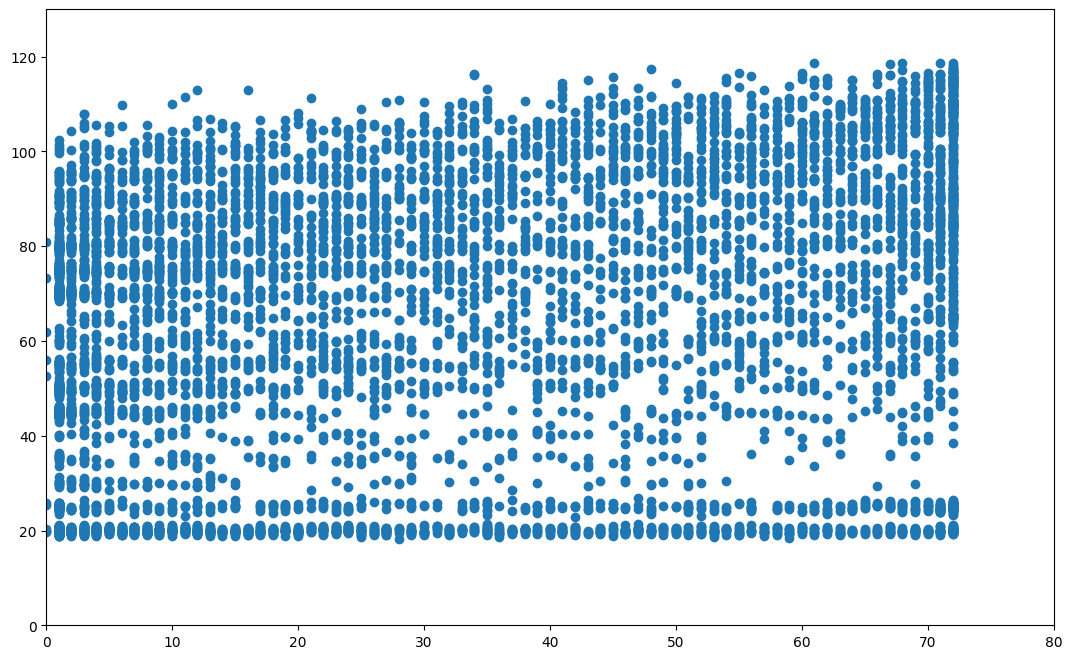

In [52]:
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.monthly_charges )
plt.ylim(0, 130)
plt.xlim(0, 80)
plt.show()

In [41]:
r, p = stats.pearsonr(tc.tenure, tc.monthly_charges)

In [42]:
r

0.24789985628615246

In [43]:
p

4.094044991476844e-99

In [44]:
a = 0.05

if p < a:
    print('Your result is significant')

else:
    print('Your result was not significant')

Your result is significant


b) Total charges?

In [49]:
tc.total_charges = tc.total_charges.replace(' ', np.nan)
tc.total_charges = tc.total_charges.astype(float)

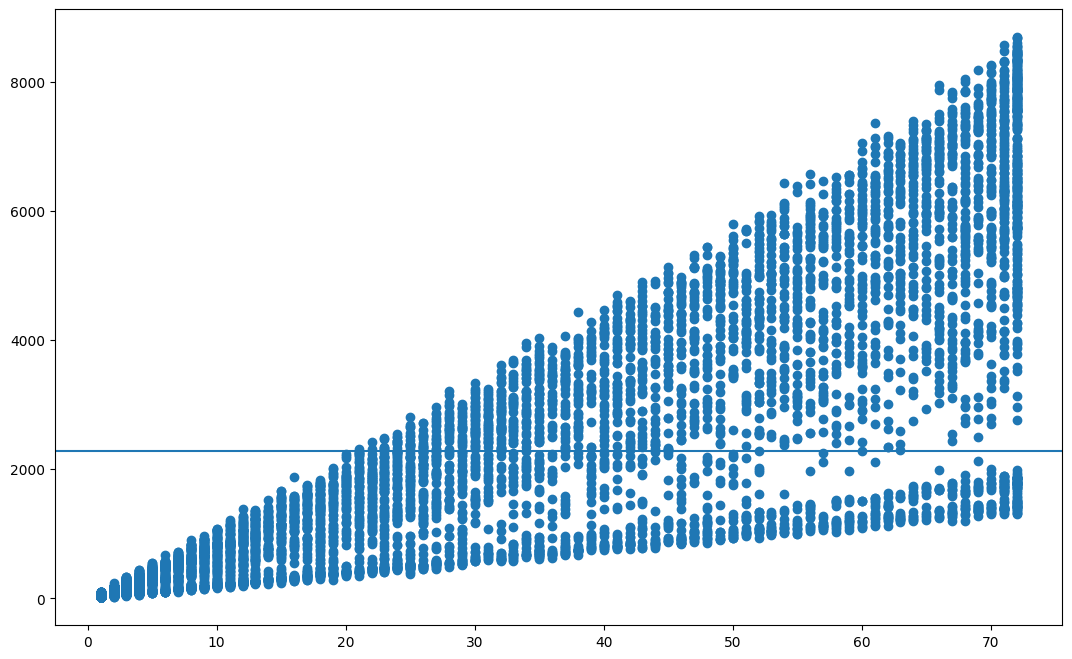

In [51]:
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.total_charges)
plt.axhline(y=np.nanmean(tc.total_charges))
plt.show()

In [ ]:
tc_cleaned = tc.dropna(subset=['tenure', 'total_charges'])

In [ ]:
r, p = stats.pearsonr(tc_cleaned.tenure, tc_cleaned.total_charges)

In [55]:
p

4.094044991476844e-99

In [53]:
a = 0.05

if p < a:
    print('Your result is significant')

else:
    print('Your result was not significant')

Your result is significant


c) What happens if you control for phone and internet service?

In [56]:
def get_db_url(database):
    return get_connection(database)

In [57]:
url = get_db_url('telco_churn')

In [58]:
engine =  create_engine(url)

In [59]:
query = '''
        SELECT tenure, phone_service, internet_service_type, monthly_charges, total_charges
        FROM customers
        LEFT JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
        WHERE phone_service = 'Yes' AND internet_service_type = 'DSL'
        '''

In [60]:
text_query = text(query)

In [61]:
tc = pd.read_sql(text(query), engine.connect())
tc.head()

,tenure,phone_service,internet_service_type,monthly_charges,total_charges
0,9,Yes,DSL,65.60,593.3
1,9,Yes,DSL,59.90,542.4
2,9,Yes,DSL,69.40,571.45
3,7,Yes,DSL,48.20,340.35
4,65,Yes,DSL,90.45,5957.9


In [63]:
tc.total_charges = tc.total_charges.replace(' ', np.nan)
tc.total_charges = tc.total_charges.astype(float)

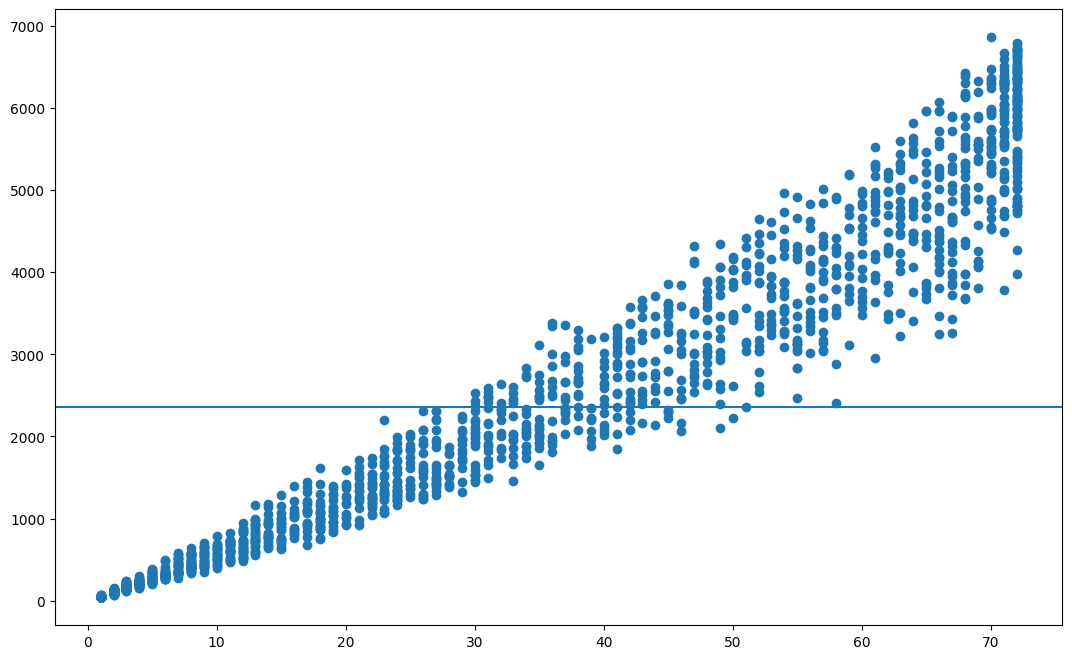

In [77]:
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.total_charges)
plt.axhline(y=np.nanmean(tc.total_charges))
plt.show()

In [65]:
tc_cleaned = tc.dropna(subset=['tenure', 'total_charges'])

In [66]:
r, p = stats.pearsonr(tc_cleaned.tenure, tc_cleaned.tenure)

In [67]:
a = 0.05

if p < a:
    print('Your result is significant')

else:
    print('Your result was not significant')

Your result is significant


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3) Use the employees database.

In [69]:
def get_db_url(database):
    return get_connection(database)

In [70]:
url = get_db_url('employees')

In [71]:
engine =  create_engine(url)

In [72]:
query = '''
        SELECT dept_emp.emp_no, dept_emp.from_date, dept_emp.to_date, salary
        FROM dept_emp
        JOIN salaries ON salaries.emp_no = dept_emp.emp_no
        '''

In [73]:
text_query = text(query)

In [74]:
df = pd.read_sql(text(query), engine.connect())
df.head()

,emp_no,from_date,to_date,salary
0,10001,1986-06-26,9999-01-01,60117
1,10001,1986-06-26,9999-01-01,62102
2,10001,1986-06-26,9999-01-01,66074
3,10001,1986-06-26,9999-01-01,66596
4,10001,1986-06-26,9999-01-01,66961


a) Is there a relationship between how long an employee has been with the company and their salary?

In [75]:
df.from_date.max()

datetime.date(2002, 8, 1)

In [79]:
df.to_date = df.from_date.max()
df.head()

,emp_no,from_date,to_date,salary
0,10001,1986-06-26,2002-08-01,60117
1,10001,1986-06-26,2002-08-01,62102
2,10001,1986-06-26,2002-08-01,66074
3,10001,1986-06-26,2002-08-01,66596
4,10001,1986-06-26,2002-08-01,66961


In [113]:
df['tenure'] = df.from_date.max() - df.from_date
df.head()

,emp_no,from_date,to_date,salary,tenure,tenure_days
0,10001,1986-06-26,2002-08-01,60117,"5880 days, 0:00:00",NaN
1,10001,1986-06-26,2002-08-01,62102,"5880 days, 0:00:00",NaN
2,10001,1986-06-26,2002-08-01,66074,"5880 days, 0:00:00",NaN
3,10001,1986-06-26,2002-08-01,66596,"5880 days, 0:00:00",NaN
4,10001,1986-06-26,2002-08-01,66961,"5880 days, 0:00:00",NaN


4) Use the sleepstudy data.

Is there a relationship between days and reaction time?

In [83]:
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


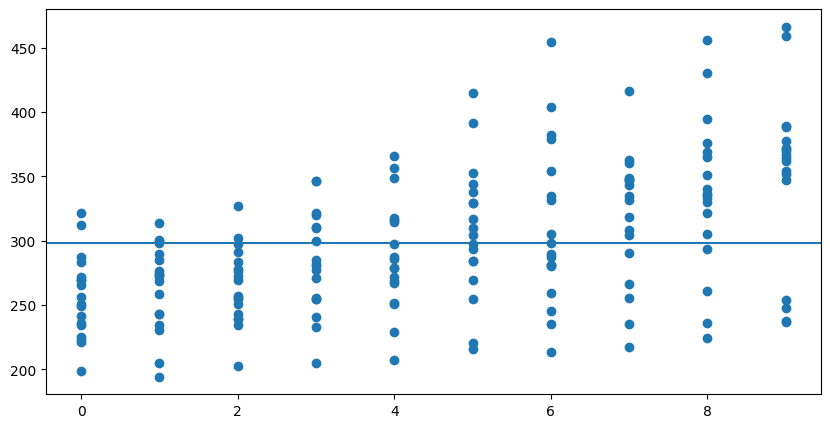

In [91]:
plt.figure(figsize = (10, 5))
plt.scatter(ss.Days, ss.Reaction)
plt.axhline(y=np.nanmean(ss.Reaction))
plt.show()

In [85]:
r, p = stats.pearsonr(ss.Days, ss.Reaction)

In [86]:
p

9.894096322214486e-15

In [87]:
r

0.5352302262650255

In [88]:
a = 0.05

if p < a:
    print('Your result is significant')

else:
    print('Your result is NOT significant')

Your result is significant
